# Clase 1
## 1- Sistema estimador de potencia instantanea
Calcula punto a punto la potencia instantánea de la señal
$$y[n] = (x[n])^2$$

<StemContainer object of 3 artists>

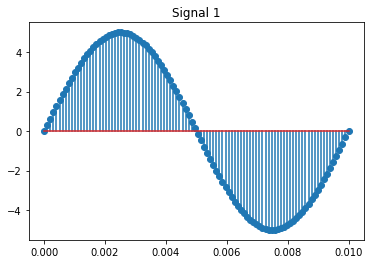

In [34]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from __future__ import division

########### Parámetros Iniciales ###########
Fs = 10000  # Sampling Freq 10KHz
N = 100      # Samples number
t = np.linspace(0,N/Fs,num=N) #Crea una variable de tiempo desde 0, con intervalos de 1/Fs

f1 = 100   # 100Hz
A1 = 5

signal_1 = A1 * np.sin(2*np.pi*f1*t)

plt.title("Signal 1")
plt.stem(t,signal_1)

<StemContainer object of 3 artists>

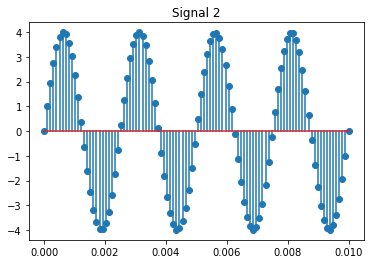

In [35]:
f2 = 400 # 350KHz
A2 = 4
signal_2 = A2 * np.sin(2*np.pi*f2*t)

plt.title("Signal 2")
plt.stem(t,signal_2)

<StemContainer object of 3 artists>

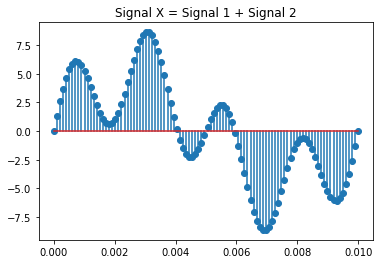

In [36]:
signal_x = signal_1 + signal_2
plt.title("Signal X = Signal 1 + Signal 2")
plt.stem(t,signal_x)


<StemContainer object of 3 artists>

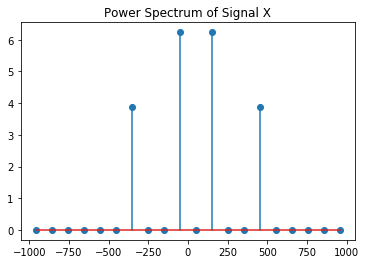

In [37]:
spec_sig_x = abs(np.fft.fftshift(fft(signal_x)))/N
spec_pw_x = np.power(np.abs(spec_sig_x),2)
f = np.linspace(-Fs/2,Fs/2,N)

plt.title("Power Spectrum of Signal X")
plt.stem(f[int(N/2)-10:int(N/2)+10], spec_pw_x[int(N/2)-10:int(N/2)+10])

## Equivalencia Potencia Espectra y Potencia Temporal
$$ {{1} \over {N}} \sum_{n=0}^{N-1} | x[n] | ^2 = \sum_{k=0}^{N-1} |X[k]|^2 $$
    


In [30]:
#Calculo de la potencia espectral acumulada
Spec_Pot_acum = 0
for n in xrange (0,N):
    Spec_Pot_acum = Spec_Pot_acum + np.power(spec_sig_x[n],2)
    # El termino agregado N/2 es por la FFT (un escalar de ajuste, ya lo veremos!)
print "Potencia Espectral acumulada: "+str(Spec_Pot_acum)

#Calculo de potencia temporal acumulada
Time_Pot_acum = 0
for n in xrange (0,N):
    Time_Pot_acum = Time_Pot_acum + np.power(signal_x[n],2)/N
print "Potencia Temporal acumulada: "+str(Time_Pot_acum)
print "Los valores son idénticos"


Potencia Espectral acumulada: 20.4795
Potencia Temporal acumulada: 20.4795
Los valores son idénticos


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


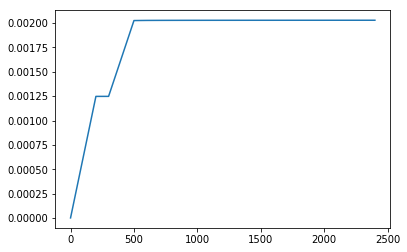

In [38]:
# Calculo de la potencia espectral acumulada en funcion del ancho de banda
BW = np.linspace(0,Fs/2-Fs/N,(N/2))
Pot_BW = np.zeros(len(BW))
for bw_i in BW:
    index = int(bw_i/(Fs/N))
    min_ind = int(N/2-index+1)
    max_ind = int(N/2+index+1)
    
    for k in range(min_ind,max_ind):
        Pot_BW[index]= Pot_BW[index] + spec_pw_x[k]/(np.power(N,2))
        
plt.plot(BW[0:int(len(BW)/2)],Pot_BW[0:int(len(BW)/2)])        